1. 연관성 분석

In [13]:
# 1. 패키지 임포트
import mlxtend.frequent_patterns
import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
import yellowbrick.cluster

import sklearn.cluster
import sklearn.metrics
import sklearn.decomposition

In [14]:
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (50, 10)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['axes.grid'] = True

In [15]:
%%html
<style>
    table { display: inline-block}
    .rendered_html td, .rendered_html th { text-align: left;}
</style>    

In [16]:
# 2. 샘플용 데이터 로딩
df = pandas.read_csv('..\data\Groceries_dataset.csv')
display(df)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [17]:
# 3. 조건 및 파라미터 설정
dict_args = dict()

dict_args['id_col_name'] = 'Member_number'
dict_args['sequence_col_name'] = 'Date'
dict_args['product_col_name'] = 'itemDescription'
dict_args['base_file'] = '..\data\Groceries_dataset.csv'

# 최소 지지도
dict_args['min_support'] = 0.1
# 최소 신뢰도
dict_args['min_threshold'] = 0.01
print(dict_args)

{'id_col_name': 'Member_number', 'sequence_col_name': 'Date', 'product_col_name': 'itemDescription', 'base_file': '..\\data\\Groceries_dataset.csv', 'min_support': 0.1, 'min_threshold': 0.01}


In [22]:
# 4. 데이터 전처리
set_items = set()
df_source = pandas.read_csv(dict_args['base_file'])
df_source = df_source.sort_values(by=[dict_args['id_col_name'], dict_args['sequence_col_name'], dict_args['product_col_name']], ascending=True)
df_source[dict_args['product_col_name']] = df_source[dict_args['product_col_name']].str.strip()
df_source['constants'] = 1

df_ar = pandas.pivot_table(df_source, values='constants', index=[dict_args['id_col_name']],
                           columns=[dict_args['product_col_name']], aggfunc=numpy.sum, fill_value=0)
for col_name in df_ar.columns:
    df_ar[col_name] = numpy.where(df_ar[col_name] > 1, 1, df_ar[col_name])
display(df)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [25]:
# 5. 연관성분석(Association Rule) 실행
freq_items = mlxtend.frequent_patterns.apriori(df_ar, min_support=dict_args['min_support'],
                                               use_colnames=True, verbose=1)
df_rules = mlxtend.frequent_patterns.association_rules(freq_items, metric='confidence', min_threshold=dict_args['min_threshold']).sort_values(by = ['lift', 'confidence', 'support'])#, ascening=False)
df_rules = df_rules.sort_values(by = ['support','lift'])#, ascending=False)
display(df_rules)

Processing 57 combinations | Sampling itemset size 32


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(whole milk),(sausage),0.458184,0.206003,0.106978,0.233483,1.133394,0.012591,1.035850
19,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
14,(yogurt),(rolls/buns),0.282966,0.349666,0.111339,0.393472,1.125279,0.012396,1.072224
15,(rolls/buns),(yogurt),0.349666,0.282966,0.111339,0.318415,1.125279,0.012396,1.052011
0,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790
1,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
16,(root vegetables),(whole milk),0.230631,0.458184,0.113135,0.490545,1.070630,0.007464,1.063522
17,(whole milk),(root vegetables),0.458184,0.230631,0.113135,0.246920,1.070630,0.007464,1.021630
23,(tropical fruit),(whole milk),0.233710,0.458184,0.116470,0.498353,1.087672,0.009388,1.080076
22,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473


<AxesSubplot:xlabel='index'>

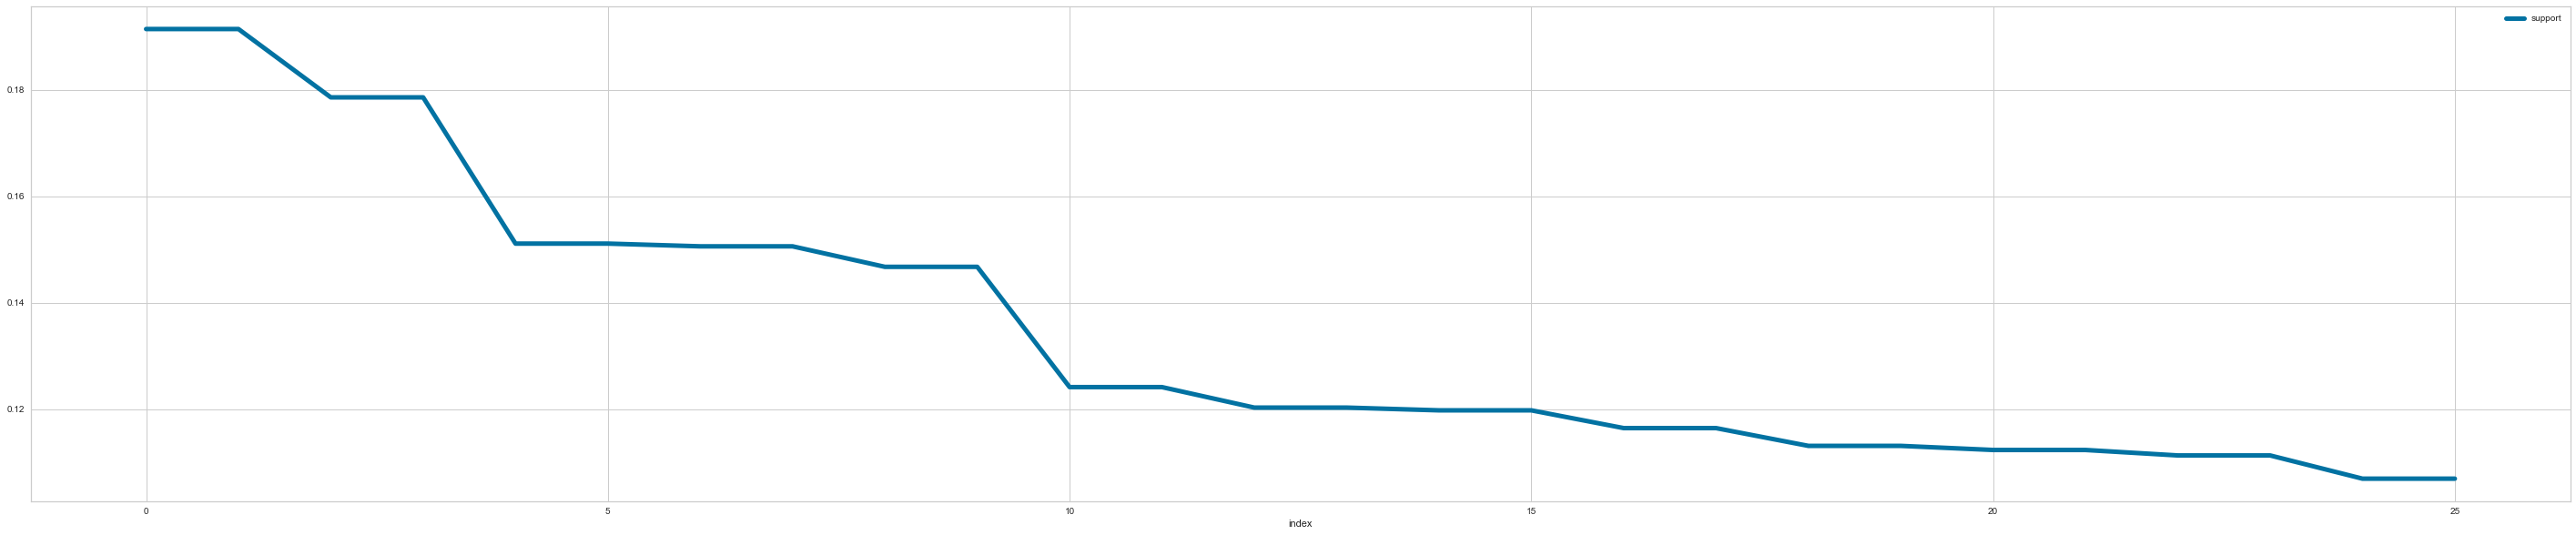

In [27]:
# 6. 결과 확인
df_plot = df_rules.sort_values(by='support', ascending=False)
df_plot['index'] = numpy.arange(df_plot.shape[0])
df_plot = df_plot.set_index(['index'])
df_plot = df_plot[['support']]
df_plot.plot()